In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Cargar el dataset
data = pd.read_csv('./hds.csv')

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['Heart_Risk'])
y = data['Heart_Risk']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

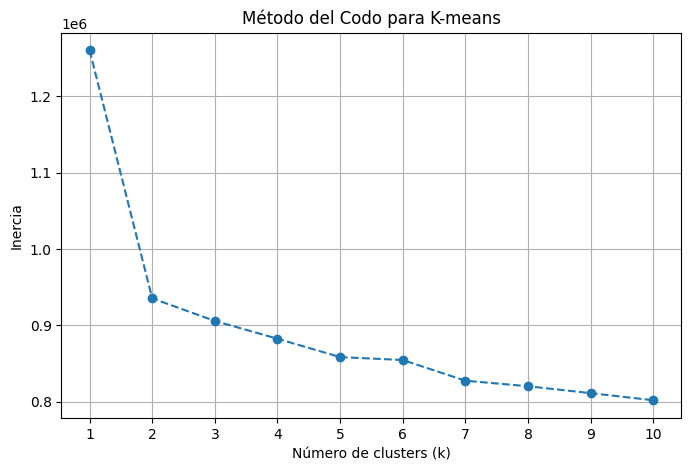

In [3]:
inertia = []
k_values = range(1, 11)  # Probamos con 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(k_values)
plt.grid()
plt.show()

In [7]:
k = 3  # Ajusta este valor según el gráfico

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la información de los clusters al dataset
X['Cluster'] = clusters

In [8]:
X['Cluster'].value_counts()

Cluster
0    34688
1    24642
2    10670
Name: count, dtype: int64

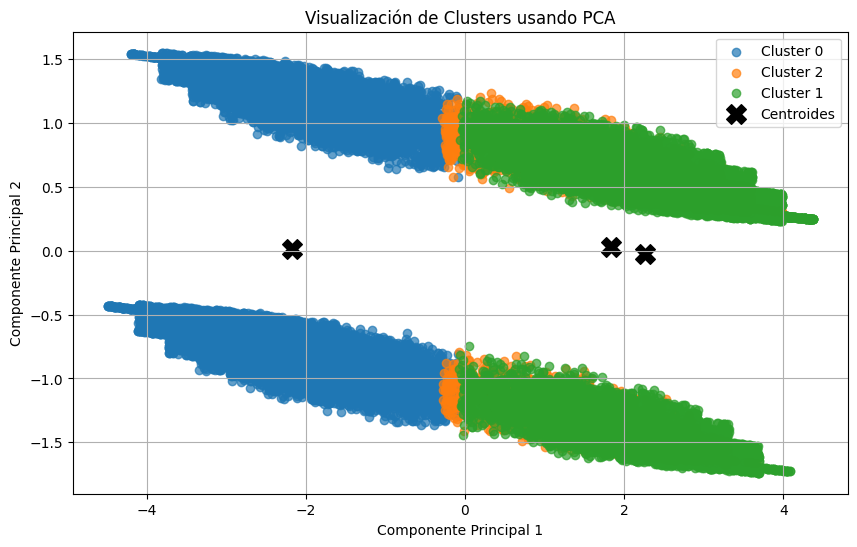

In [10]:
# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)  # Reducimos a 2 dimensiones para poder graficar
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales y los clusters
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = clusters

# Graficar los clusters
plt.figure(figsize=(10, 6))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['Componente 1'],
                df_pca[df_pca['Cluster'] == cluster]['Componente 2'],
                label=f'Cluster {cluster}', alpha=0.7)

# Graficar los centroides de los clusters
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='black', label='Centroides')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters usando PCA')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 0.006612607142857142
Coeficiente de Determinación (R²): 0.9735495692693525
